Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3 

C:\Users\mahes\AppData\Local\Temp\ipykernel_1592\3706415641.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mahes\AppData\Local\Temp\ipykernel_1592\3706415641.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

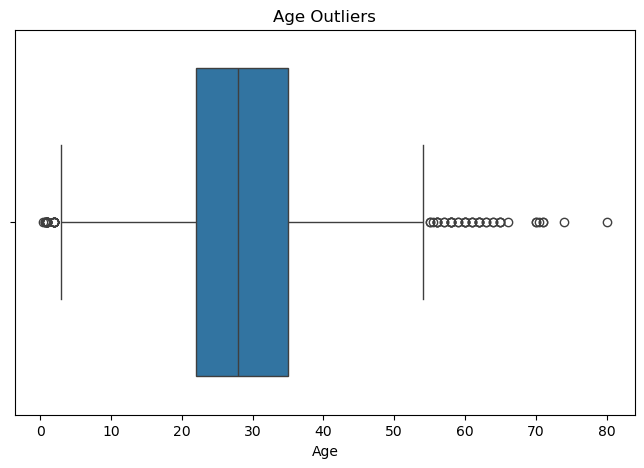

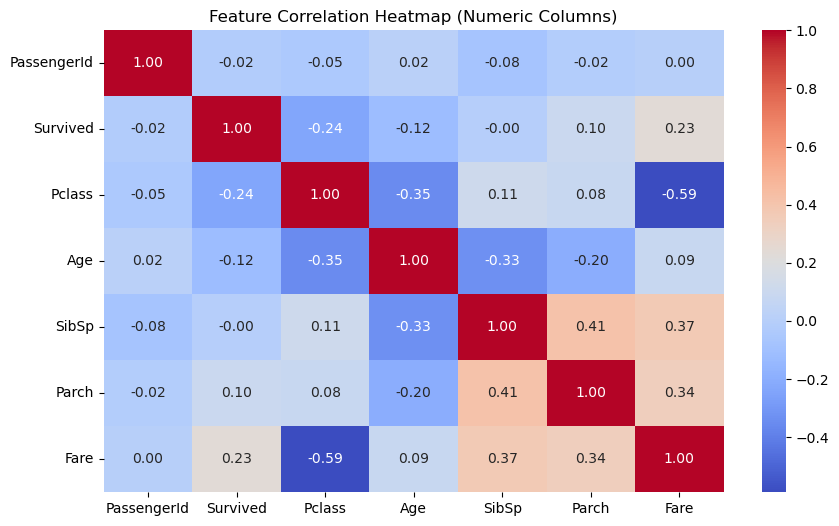

C:\Users\mahes\AppData\Local\Temp\ipykernel_1592\3706415641.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


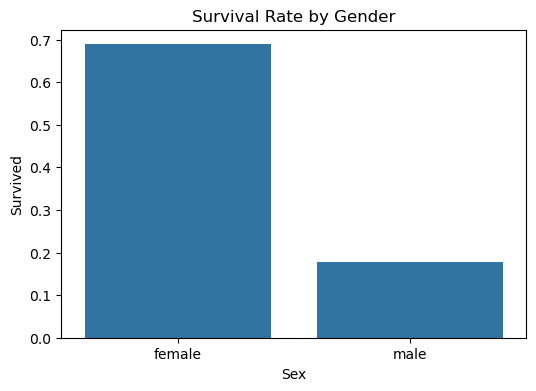

C:\Users\mahes\AppData\Local\Temp\ipykernel_1592\3706415641.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


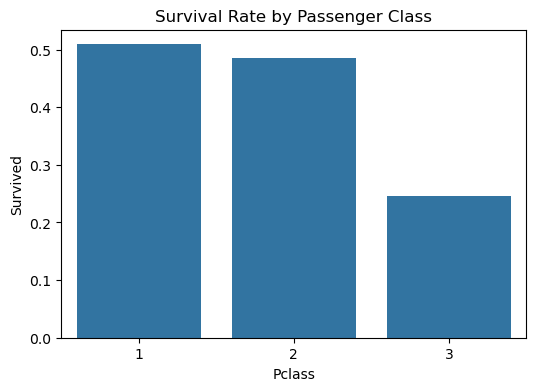

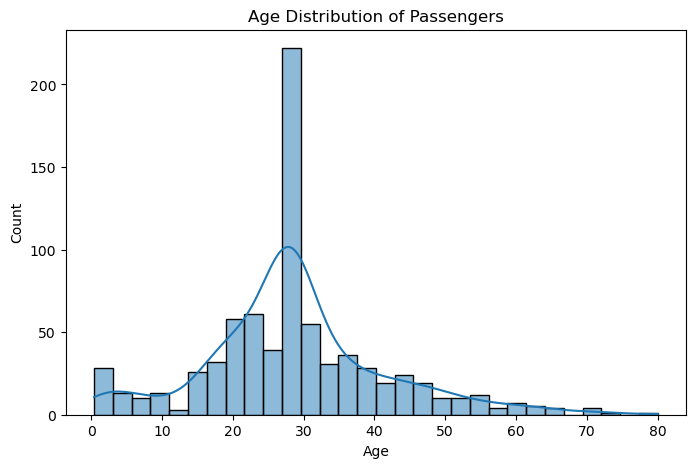


Updated Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  775 non-null    int64   
 1   Survived     775 non-null    int64   
 2   Pclass       775 non-null    int64   
 3   Name         775 non-null    object  
 4   Sex          775 non-null    category
 5   Age          775 non-null    float64 
 6   SibSp        775 non-null    int64   
 7   Parch        775 non-null    int64   
 8   Ticket       775 non-null    object  
 9   Fare         775 non-null    float64 
 10  Embarked     775 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 62.3+ KB


In [28]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (train.csv)
file_path =df = pd.read_csv("D:/Internship Tasks/titanic/train.csv")
df = pd.read_csv("D:/Internship Tasks/titanic/train.csv")

# Display basic dataset information
print("Dataset Info:\n")
df.info()
print("\nFirst 5 Rows:\n", df.head())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Convert 'Sex' and 'Embarked' to categorical types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Check for outliers using a boxplot (Age)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()

# Remove outliers in 'Fare' (keeping values within 1.5*IQR)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

# Correlation heatmap (Only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap (Numeric Columns)")
plt.show()

# Survival Rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Gender")
plt.show()

# Survival Rate by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

# Final dataset information
print("\nUpdated Dataset Info:\n")
df.info()
